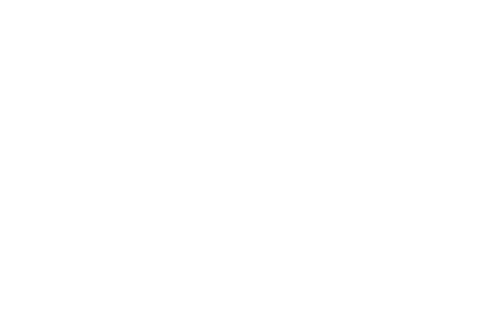

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
liste_de_postes = []


def ajout_poste(Rep, Nom, P, L):
    
    G.add_node(Rep,Nom = Nom, Puissance = P, Longueur = L)
    G.node[Rep]["Cumul"] = G.node[Rep]["Longueur"]
    liste_de_postes.append(Rep)

#Ajout tés
def ajout_té(Rep, aval1, aval2, L):
    
    G.add_node(Rep, Longueur = L)
    G.node[Rep]["Puissance"] = G.node[aval1]["Puissance"] + G.node[aval2]["Puissance"]
    G.add_edge(aval1,Rep)
    G.add_edge(aval2,Rep)
    G[aval1][Rep]["Longueur"] = G.nodes[aval1]["Longueur"]
    G[aval2][Rep]["Longueur"] = G.nodes[aval2]["Longueur"]
    liste_de_postes.append(Rep)
    
#Ajout Poste de production, boucle le réseau
    
def ajout_prod(Nom, té):
    G.add_node("Prod",Longueur=0)
    G.add_edge("Prod",té)
    G.node["Prod"]["Puissance"] = G.node[té]["Puissance"]
    

#établir liste des routes pout tous les postes

def creation_routes(liste_de_postes):
    liste_de_routes=[]
    for poste in liste_de_postes:
        for path in nx.all_simple_paths(G, source="Prod", target=poste):
            liste_de_routes.append(path)
            


#Calcul des cumuls:

def calcul_cumul(liste_de_routes):
    for route in liste_de_routes:
        cumul = 0
        for poste in route:
            cumul += G.node[poste]["Longueur"]
        G.node[route[-1]]["Cumul"] = cumul 
            
    


        
#print(G.nodes.data())


#Dessin

pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=16, with_labels=True)

#coordonées des postes, on vera plus tard commend le gérer
#pos = {
#    1:(4,3),
#    2:(4,1),
#    3:(3,3),
#    4:(2,3),
#    "t1":(4,2),
#    "t2":(3,2),
#    "t3":(2,2),
#    "Prod":(1,2)
#}


#nx.draw_shell(G)
#nx.draw_kamada_kawai(G)
#nx.draw_networkx(G,pos, arrows=True, with_labels=True)



